<a href="https://colab.research.google.com/github/satyambhatt5/Data_science/blob/main/Multiple_model_Cross_validation_Technique_%26_industry_model_devlopement_process_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


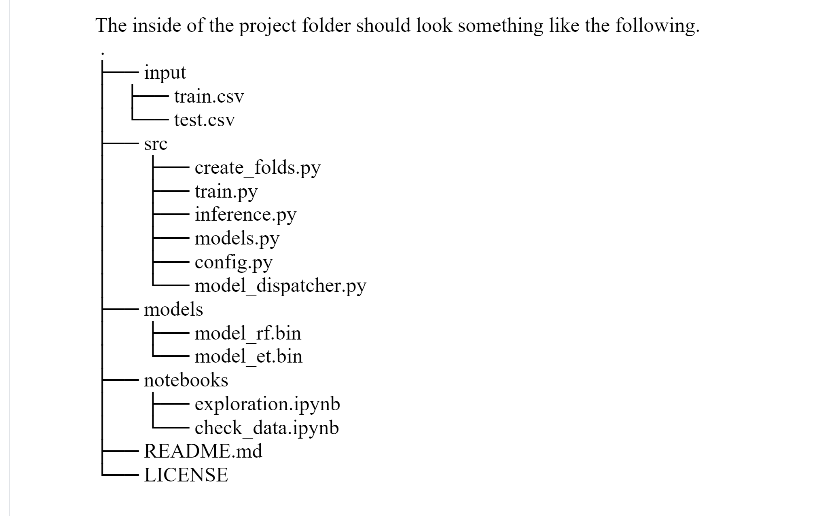

•	 Business understanding

•	 Data understanding

•	 Data preparation

•	 Modeling

•	 Evaluation

•	 Deployment

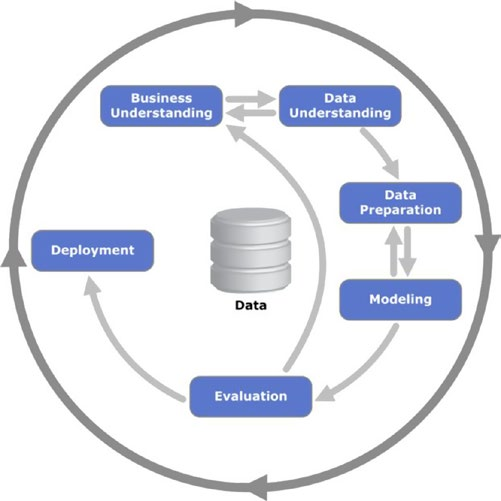

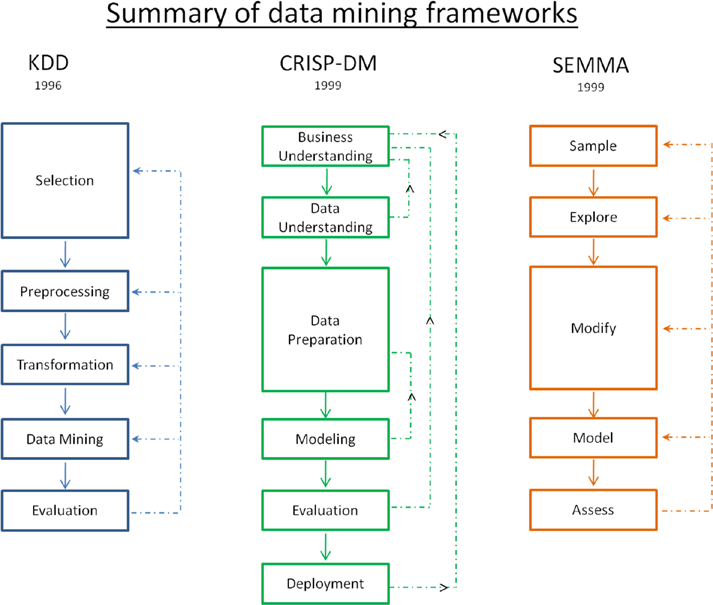



**Phase 1: Business Understanding**

As the name suggests the focus at this stage is to understand the overall project objectives and 
expectations from a business perspective. These objectives are converted to a data mining 
or machine learning problem definition and a plan of action around data requirements, 
business owners input, and how outcome performance evaluation metrics are designed.


**Phase 2: Data Understanding**

In this phase, initial data are collected that were identified as requirements in the 
previous phase. Activities are carried out to understanding data gaps or relevance of the 
data to the objective in hand, any data quality issues, and first insights into the data to 
bring out appropriate hypotheses. The outcome of this phase will be presented to the 
business iteratively to bring more clarity into the business understanding and project 
objective.

**Phase 3: Data Preparation**


**bold text**
This phase is all about cleaning the data so that it’s ready to be used for the model 
building phase. Cleaning data could involve filling the known data gaps from 
previous steps, missing value treatments, identifying the important features, applying 
transformations, and creating new relevant features where applicable. This is one of the 
most important phases as the model’s accuracy will depend significantly on the quality of 
data that is being fed into the algorithm to learn the patterns.


Phase 4: **Modeling**


There are multiple machine learning algorithms available to solve a given problem. So 
various appropriate machine learning algorithms are applied onto the clean dataset, and 
their parameters are tuned to the optimal possible values. Model performance for each of 
the applied models is recorded.


Phase 5: **Evaluation**


In this stage a benchmarking exercise will be carried out among all the different models 
that were identified to have been giving high accuracy. Model will be tested against data 
that was not used as part of the training to evaluate its performance consistency. The 
results will be verified against the business requirement identified in phase 1. The subject 
matter experts from the business will be involved to ensure that the model results are 
accurate and usable as per required by the project objective.


Phase 6: **Deployment**


The key focus in this phase is the usability of the model output. So the final model signed 
off by the subject matter expert will be implemented, and the consumers of the model 
output will be trained on how to interpret or use it to take the business decisions defined



KDD vs. CRISP-DM vs. SEMMA


KDD is the oldest of three frameworks. CRISP-DM and SEMMA seem to be the practical 
implementation of the KDD process. CRISP-DM is more complete as the iterative flow 
of the knowledge across and between phases has been clearly defined. Also it covers all 
areas of building a reliable machine learning systems from a business-world perspective. 
In SEMMA’s sample stage it’s important that you have a true understanding of all 
aspects of business to ensure the sampled data retains maximum information. However 
the drastic innovation in the recent past has led to reduced costs for data storage and 
computational power, which enables us to apply machine learning algorithms on the 
entire data efficiently, almost removing the need for sampling.
We can see that generally the core phases are covered by all three frameworks and 
there is not a huge difference between these frameworks. Overall these processes guide 
us about how data mining techniques can be applied into practical scenarios. In general 
most of the researchers and data mining experts follow the KDD and CRISP-DM process 
model because it is more complete and accurate. I personally recommend following 
CRISP-DM for usage in business environment as it provides coverage of end-to-end 
business activity and the life cycle of building a machine learning system

In [ ]:
wine =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Practice Data Set/winequality-red.csv")

In [ ]:
wine.head()


In [ ]:
quality_mapping = {3:0,4:1,5:2,6:3,7:4,8:5}

In [ ]:
#now convert the all value and mapped into the value 


wine.loc[:, "quality"]=wine.quality.map(quality_mapping)

In [ ]:
wine

In [ ]:
#Split the data into the dependent ans not dependent data
X=wine.iloc[:,1:11].values
y=wine.iloc[:,-1].values



In [ ]:
#now feature engineering the data or scale the data 
# * Feature Scaling | Scaling the variables | standardizign the variable | Z - score | Mean = 0 and STD = 1
# To get all the variables on same scale [towards ZERO]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=    train_test_split(X,y,random_state=32,test_size=.25)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)




In [ ]:
#standard scale the  data 

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr=LogisticRegression()
sv=SVC()
dc=DecisionTreeClassifier()
rn=RandomForestClassifier()



In [ ]:
#logistic regression
lr.fit(X_train,y_train)
lr.score(X_test,y_test)


In [ ]:
#support vector 

sv.fit(X_train,y_train)
sv.score(X_test,y_test)

In [ ]:
#Random forest tree

rn.fit(X_train,y_train)
rn.score(X_test,y_test)

In [ ]:
#decision tree 

dc.fit(X_train,y_train)
dc.score(X_test,y_test)

In [ ]:
#many cross validation techinque we can do it cross validation avoid the overfitting and underfitting 
#kfold 
#Stratified kfold 
#cross validate 
#leave one out 

#first cross varified the data with cross validation and then split the data into train and test in to data 


from sklearn.model_selection import cross_validate,cross_val_score,KFold,LeaveOneOut

kf=KFold(n_splits=5)
kf


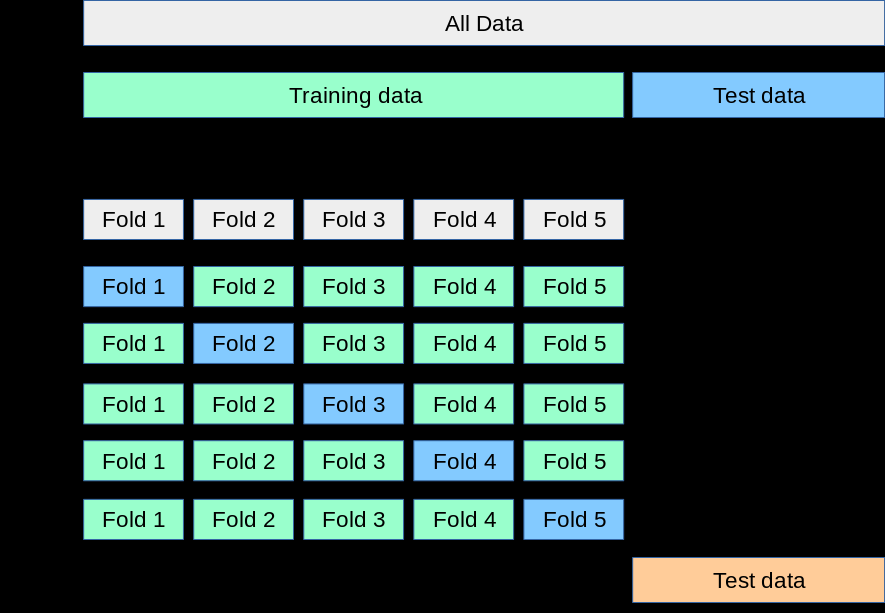

In [ ]:
#see the how the split work in the given data set 

for train_index,test_index in kf.split([1,2,3,4,5,6,7,8,9]):
  print(train_index,test_index)

In [ ]:
#now if dont want to write the code again and again then 

def get_score(model,X_train,X_test,y_train,y_test):
  model.fit(X_train,y_train)
  return model.score(X_test,y_test)

In [ ]:
get_score(lr,X_train,X_test,y_train,y_test)

In [ ]:
get_score(dc,X_train,X_test,y_train,y_test)

In [ ]:
get_score(rn,X_train,X_test,y_train,y_test)

In [ ]:
get_score(sv,X_train,X_test,y_train,y_test)

In [ ]:
#now we validate the kfold cross validation in real word data 

from sklearn.model_selection import StratifiedKFold

skfold=StratifiedKFold(n_splits=5)



In [ ]:
score_l=[]
score_sv=[]
score_dc=[]
score_rn=[]

for train_index,test_index in kf.split(wine):
  X_train,X_test,y_train,y_test=X[train_index],X[test_index], y[train_index],y[test_index]

  score_l.append(get_score(lr,X_train,X_test,y_train,y_test))
  score_dc.append(get_score(dc,X_train,X_test,y_train,y_test))
  score_sv.append(get_score(sv,X_train,X_test,y_train,y_test))
  score_rn.append(get_score(rn,X_train,X_test,y_train,y_test))

  
  



In [ ]:
#print score of the model with different cross validation for logistic regression of the model
score_l

In [ ]:
#print score of the model with different cross validation for DECISION TREE MODEL of the model
score_dc

In [ ]:
#print score of the model with different cross validation for RANDOM FOREST TREE  of the model
score_rn

In [ ]:
#print score of the model with different cross validation for support vectore machine  of the model
score_sv

In [ ]:
#it also do same thing what we did earlier in given data 


from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(),X,y,cv=3)

In [ ]:
#throgh this ways we can evaluate the model 
cross_val_score(RandomForestClassifier(n_estimators=100),X,y)

In [ ]:

#numpy 

np.array([[1,2,3],[4,5,6]])


In [ ]:

data = {'Gender': ['F', 'M', 'M'],'Emp_ID': ['E01', 'E02', 'E03'], 'Age': [25, 27, 25]}


pd.DataFrame(data)

In [ ]:
#Reading and Writing Data
#We’ll see three commonly used file formats: csv, text file, and Excel in Listing 2-19.
#Listing 2-19. Reading / writing data from csv, text, Excel
# Reading


#df=pd.read_csv('Data/mtcars.csv') # from csv
#df=pd.read_csv('Data/mtcars.txt', sep='\t') # from text file
#df=pd.read_excel('Data/mtcars.xlsx','Sheet2') # from Excel

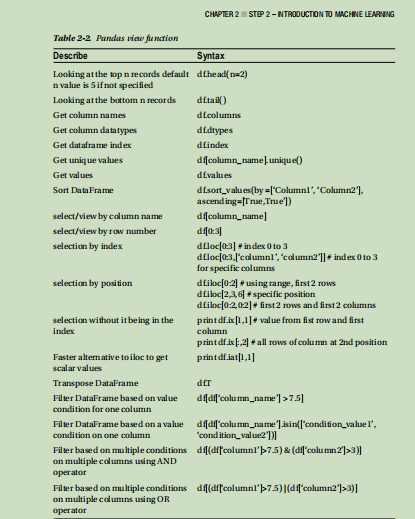


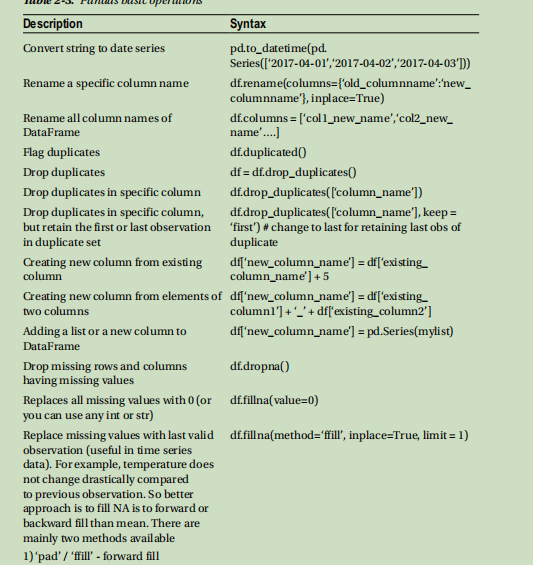



In [ ]:
df = pd.DataFrame({'Name' : ['jack', 'jane', 'jack', 'jane', 'jack', 'jane', 'jack', 'jane'],'State' : ['SFO', 'SFO', 'NYK', 'CA', 'NYK', 'NYK', 'SFO', 'CA'],
 'Grade':['A','A','B','A','C','B','C','A'],
 'Age' : np.random.uniform(24, 50, size=8),
 'Salary' : np.random.uniform(3000, 5000, size=8),})
df

Pivot Tables
Pandas provides a function ‘pivot_table’ to create MS-Excel spreadsheet style pivot tables. 
It can take following arguments:
•	 data: DataFrame object,
•	 values: column to aggregate,
•	 index: row labels,
•	 columns: column labels,
•	 aggfunc: aggregation function to be used on values, default is 
NumPy.mean (see Listing 2-30).

In [ ]:
#group by 
df.groupby(['Name','State']).max()

In [ ]:
# by state and name find mean age for each grade #pivot table 


pd.pivot_table(df, values='Age', index=['State', 'Name'], columns=['Grade'])